In [1]:
import pdb

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 500)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K
from tensorflow import feature_column
#print(tf.__version__)

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from numpy import ceil

from datetime import datetime

import pickle

Using TensorFlow backend.


In [2]:
output_desc = {'001': "Drop Util, 5NN, 128 unit/each, Adam, relu", 
              '002': "Drop Util, 7NN, 256 unit/each, Adam, relu", 
              '003': "Drop Util, 3NN, 256 unit/each, Adam, relu",
              '004': "Drop Util, 2NN, 1024 unit/each, Adam, relu"}
output = '004'

def save_dataframe_to_h5file(h5file):
        train.to_hdf(h5file, key='train', mode='w')
        val.to_hdf(h5file, key='val')
        test.to_hdf(h5file, key='test')
        Y_train.to_hdf(h5file, key='Y_train')
        Y_val.to_hdf(h5file, key='Y_val')
        
def load_dataframe_from_h5file(h5File):
    train = pd.read_hdf(h5file, 'train')
    val = pd.read_hdf(h5file, 'val')
    test = pd.read_hdf(h5file, 'test')
    Y_train = pd.read_hdf(h5file, 'Y_train')
    Y_val = pd.read_hdf(h5file, 'Y_val')
    return train, Y_train, val, Y_val, test
        
#pkl_file = 'dat/IsoFRemoval_DropUtilHeat_mmInputScale.pkl'
pklFile_beforeScaling = 'dat/IsoFRemoval_DropUtil_NoScale.pkl'
pklFile_afterScaling = 'dat/IsoFRemoval_DropUtil_mmInputOutputScale.pkl'
pklFile_toLoad = pklFile_afterScaling
#h5file = 'dat/IsoFRemoval_DropUtilHeat_mmInputScale.h5'#isoforest outliner removal, drop 'Utilities' and 'Heating', minmaxInputScaling
#h5File_afterScaling = 'dat/IsoFRemoval_DropUtil_mmInputScale.h5'

# 1. Load inputs

In [3]:
train = pd.read_csv('input/train.csv')
print('Original shape of the train data:', train.shape)
train.head()

Original shape of the train data: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Drop unused feature Id
train.drop('Id', axis = 1, inplace=True)

In [5]:
test = pd.read_csv('input/test.csv')
print('Original shape of the test data:', test.shape)
test_id = test.pop('Id')
test.head()

Original shape of the test data: (1459, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# Statistics of numerical features
desc_num = train.describe().transpose()
desc_num

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [7]:
# Statistics of categorical features
desc_cat = train.describe(exclude=np.number).transpose()
desc_cat

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [8]:
# Load the description file
#with open('input/data_description.txt', 'r') as desc_file:
    #get_ipython().set_next_input(desc_file.read())

In [9]:
# making the lists of numerical vs categorical features
'''
Short intro about different types of features:
https://www.tensorflow.org/guide/feature_columns
'''
target_feature = ['SalePrice']

cat_numlabel_features = ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 
                         'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
cat_features = pd.Index(train.select_dtypes(include='object').columns.tolist() + cat_numlabel_features)
num_features = train.select_dtypes(exclude='object').columns.tolist()
num_features.remove(target_feature[0])
for feature in cat_numlabel_features:
    num_features.remove(feature)
num_features = pd.Index(num_features)

target_feature = pd.Index(target_feature)
assert len(cat_features) + len(num_features) + len(target_feature) == len(train.columns.tolist())

In [10]:
#print(len(target_feature), target_feature)
#print(len(num_features), num_features)
#print(len(cat_numlabel_features), cat_numlabel_features)
#print(len(cat_features), cat_features)

In [11]:
#!!! CAUTION: np.number includes only float64 and NOT int64 --> if in the below codes,
#I use "train[column].dtype==np.number", it will fail to find all features that has null cells
na_num_list = [column for column in num_features 
               if train[column].isnull().any() or test[column].isnull().any()] 
na_cat_list = [column for column in cat_features      
               if train[column].isnull().any() or test[column].isnull().any()]
           
print(na_num_list)
print(na_cat_list)


['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']
['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'GarageYrBlt']


# 2. Clean the data

In [12]:
print(train.isnull().values.sum(), ' missing values in train before fillna')
print(test.isnull().values.sum(), ' missing values in test before fillna')

6965  missing values in train before fillna
7000  missing values in test before fillna


## 2.1 Fill in missing values in numerical features

In [13]:
''' 
LotFrontage has quite a few NA values but we can not simply fill it with 0. For some other
features such as MasVnrArea, missing values can be assigned 0 

Among the other features, probably LotArea is likely to be most correlated with LotFrontage
'''
from sklearn.linear_model import LinearRegression
lot_idx = pd.concat([train['LotFrontage'].notna(), 
                     train['LotArea'].notna(), 
                    train['LotArea']<2*10**5,
                    train['LotFrontage']<300],
                    axis=1).all(axis=1)
#Remove a few "outliners" in LotArea nd LotFrontage (just for the purpose of the estimation of mising values in LotFrontage)

lot_x = train['LotArea'][lot_idx].values.reshape(-1,1)
lot_y = train['LotFrontage'][lot_idx].values.reshape(-1,1)
estimatedFromLotArea = LinearRegression().fit(lot_x, lot_y)
score_estimatedFromLotArea = estimatedFromLotArea.score(lot_x, lot_y)

estimatedFromSqrtLotArea = LinearRegression().fit(np.sqrt(lot_x), lot_y)
score_estimatedFromSqrtLotArea = estimatedFromSqrtLotArea.score(np.sqrt(lot_x), lot_y)

In [14]:
for feature in na_num_list: 
    if feature=='LotFrontage':
        lot_x_tr = train['LotArea'][train[feature].isnull()].values.reshape(-1,1)
        lot_y_tr = estimatedFromLotArea.predict(lot_x_tr)
        train[feature][train[feature].isnull()] = lot_y_tr
        lot_x_t = test['LotArea'][test[feature].isnull()].values.reshape(-1,1)
        lot_y_t = estimatedFromLotArea.predict(lot_x_t)
        test[feature][test[feature].isnull()] = lot_y_t
    else:
        train[feature][train[feature].isnull()] = 0
        test[feature][test[feature].isnull()] = 0
    

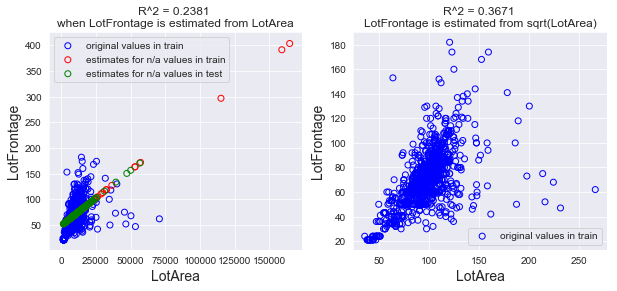

In [15]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 4)

ax[0].scatter(lot_x, lot_y, edgecolor='b', facecolor='', label='original values in train')
ax[0].scatter(lot_x_tr, lot_y_tr, edgecolor='r', facecolor='', label='estimates for n/a values in train')
ax[0].scatter(lot_x_t, lot_y_t, edgecolor='g', facecolor='', label='estimates for n/a values in test')
ax[0].set_title(f'R^2 = {score_estimatedFromLotArea:.4f} \nwhen LotFrontage is estimated from LotArea', 
                fontsize=12)
ax[1].scatter(np.sqrt(lot_x), lot_y, edgecolor='b', facecolor='', label='original values in train')
ax[1].set_title(f'R^2 = {score_estimatedFromSqrtLotArea:.4f} \nLotFrontage is estimated from sqrt(LotArea)',
                fontsize=12)
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('LotArea', fontsize=14)
ax[0].set_ylabel('LotFrontage', fontsize=14)
ax[1].set_xlabel('LotArea', fontsize=14)
ax[1].set_ylabel('LotFrontage', fontsize=14)
plt.savefig('result/LotFrontageEstimatedFromLotArea.png', bbox_inches='tight')

## 2.2 Fill in missing values in categorical features

In [16]:
fillna_with_mode = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Electrical', 
                    'KitchenQual', 'Functional', 'SaleType']
fillna_with_none = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                    'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
                    'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType']
fillna_with_zero = ['GarageYrBlt'] #I fill in the n/a values with 0 (instead of min_year or current_year)
                                    #although year=0 is not really making sense,
                                    #Because value=0 would be able to emphasize that there is NO garage
for feature in na_cat_list:
    combi = pd.concat([train[feature], test[feature]], axis=0, ignore_index=True)
    #print(feature, combi.unique(), fillna_value) #manually exam each feature to see if nan should be filled in with mode() or 'None'
    #breakpoint()
    if feature in fillna_with_mode:
        fillna_value = combi.mode().iloc[0]
    elif feature in fillna_with_none:
        fillna_value = 'None'
    elif feature in fillna_with_zero:
        fillna_value = 0
    else:
        raise ValueError('Nan or "None"?. Feature {} has {} unique values and mode {}'.format(
            feature, combi.unique(), combi.mode().iloc[0]))
    train[feature] = train[feature].fillna(fillna_value)
    test[feature] = test[feature].fillna(fillna_value)

In [17]:
print(train.isnull().values.sum(), ' missing values in train after fillna')
#train.describe()

print(test.isnull().values.sum(), ' missing values in test after fillna')
#test.describe()

0  missing values in train after fillna
0  missing values in test after fillna


In [18]:
#categorical features should be in int or str type (not float)
print(train['GarageYrBlt'].dtype)
print(test['MSSubClass'].dtype)
for feature in cat_numlabel_features:
    train[feature] = train[feature].astype(str)
    test[feature] = test[feature].astype(str)
print(train['GarageYrBlt'].dtype)
print(test['MSSubClass'].dtype)

float64
int64
object
object


# 3. Visualize the data

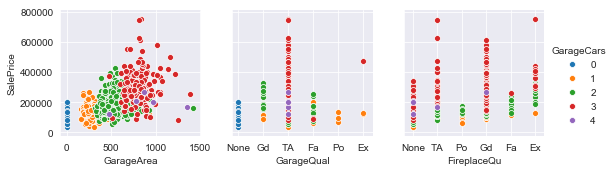

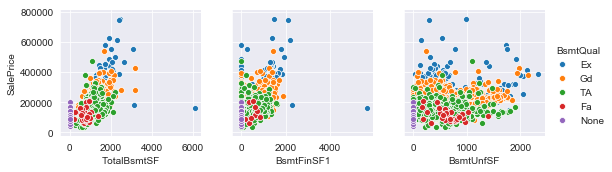

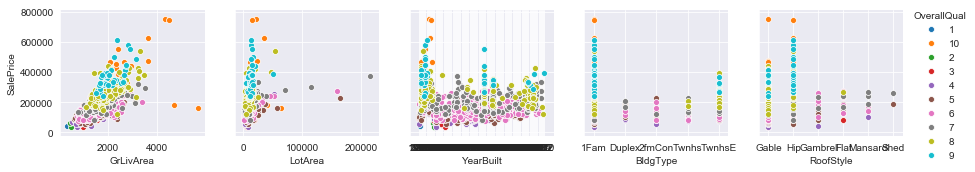

In [19]:
sns.pairplot(train, x_vars=["GarageArea", "GarageQual", "FireplaceQu", ], y_vars=["SalePrice"],
             hue="GarageCars", kind="scatter")
plt.savefig('result/Garage_SalePrice.png')
sns.pairplot(train, x_vars=["TotalBsmtSF", "BsmtFinSF1", "BsmtUnfSF"], y_vars=["SalePrice"],
             hue="BsmtQual", kind="scatter", hue_order=["Ex", "Gd", "TA", "Fa", "None"])
plt.savefig('result/Basement_SalePrice.png')
sns.pairplot(train, x_vars=["GrLivArea", "LotArea", "YearBuilt", "BldgType", "RoofStyle"], 
             y_vars=["SalePrice"], hue="OverallQual", )
plt.savefig('result/BuildingAndLot_SalePrice.png', bbox_inches='tight')

# 4. Feature engineer
## 4.1 Remove outliners

In [20]:
def remove_outliers(df_numeric, method=None, parameters={}):
    '''
    Input:
    - df_numeric: dataframe (of numerical features) of which outliners will be removed
    - method: a string can be one of the two following:
        + 'IsolationForest': use the isolationforest algorithm provided in sklearn to remove outliners
        + 'normal': remove any values that are 3 standard-derivation away from the mean
    - parameters: dictionary - parameters for the 'IsolationForest' algorithm
    
    Output:
    - isoforest_mask: mask of indexes of the outliners in the dataframe
    '''
    if method=='IsolationForest': #https://scikit-learn.org/stable/modules/outlier_detection.html#isolation-forest
        from sklearn.ensemble import IsolationForest
        clf = IsolationForest(max_samples = parameters.get('max_samples', 'auto'), 
                              random_state = parameters.get('random_state', 11), 
                              behaviour = parameters.get('behaviour', 'new'), 
                              contamination = parameters.get('contamination', 'auto'))
        isoforest_mask = clf.fit_predict(df_numeric)
        return isoforest_mask==1
    elif method=='normal':#https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame
        from scipy import stats
        return (np.abs(stats.zscore(df_numeric, axis=0)) < 3).all(axis=1)

In [21]:
print(train.shape[0], " train samples before removing outliner in train set")

1460  train samples before removing outliner in train set


In [22]:
# Comment out the line below to turn off outliner removal
isoforest_mask = remove_outliers(train[num_features], 'IsolationForest')
#isoforest_mask = remove_outliers(train[num_features], 'normal')

if 'isoforest_mask' in globals():
    train = train.loc[isoforest_mask]
    train.reset_index(drop = True, inplace = True)#drop=True: avoid the old index being added as a column
    
print(train.shape[0], " train samples after removing outliner in train set")
#X_train_numeric.describe().transpose()

1421  train samples after removing outliner in train set


## 4.2 Check for covariate-shift

In [23]:
# Split train into train and validation sets
train, val = train_test_split(train, test_size=0.2, random_state=11, shuffle=True) #80% for train and 20% for validation
train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)

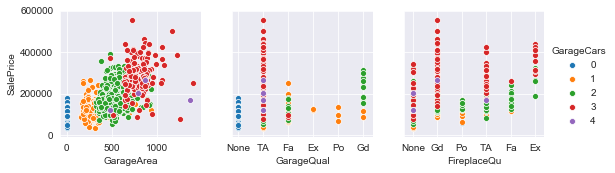

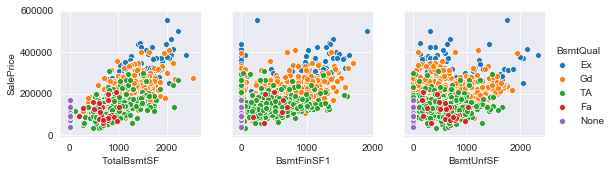

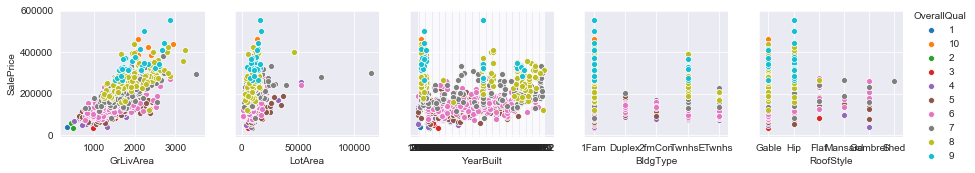

In [24]:
sns.pairplot(train, x_vars=["GarageArea", "GarageQual", "FireplaceQu", ], y_vars=["SalePrice"],
             hue="GarageCars", kind="scatter")
plt.savefig('result/Garage_SalePrice.png')
sns.pairplot(train, x_vars=["TotalBsmtSF", "BsmtFinSF1", "BsmtUnfSF"], y_vars=["SalePrice"],
             hue="BsmtQual", kind="scatter", hue_order=["Ex", "Gd", "TA", "Fa", "None"])
plt.savefig('result/Basement_SalePrice.png')
sns.pairplot(train, x_vars=["GrLivArea", "LotArea", "YearBuilt", "BldgType", "RoofStyle"], 
             y_vars=["SalePrice"], hue="OverallQual", )
plt.savefig('result/BuildingAndLot_SalePrice.png')

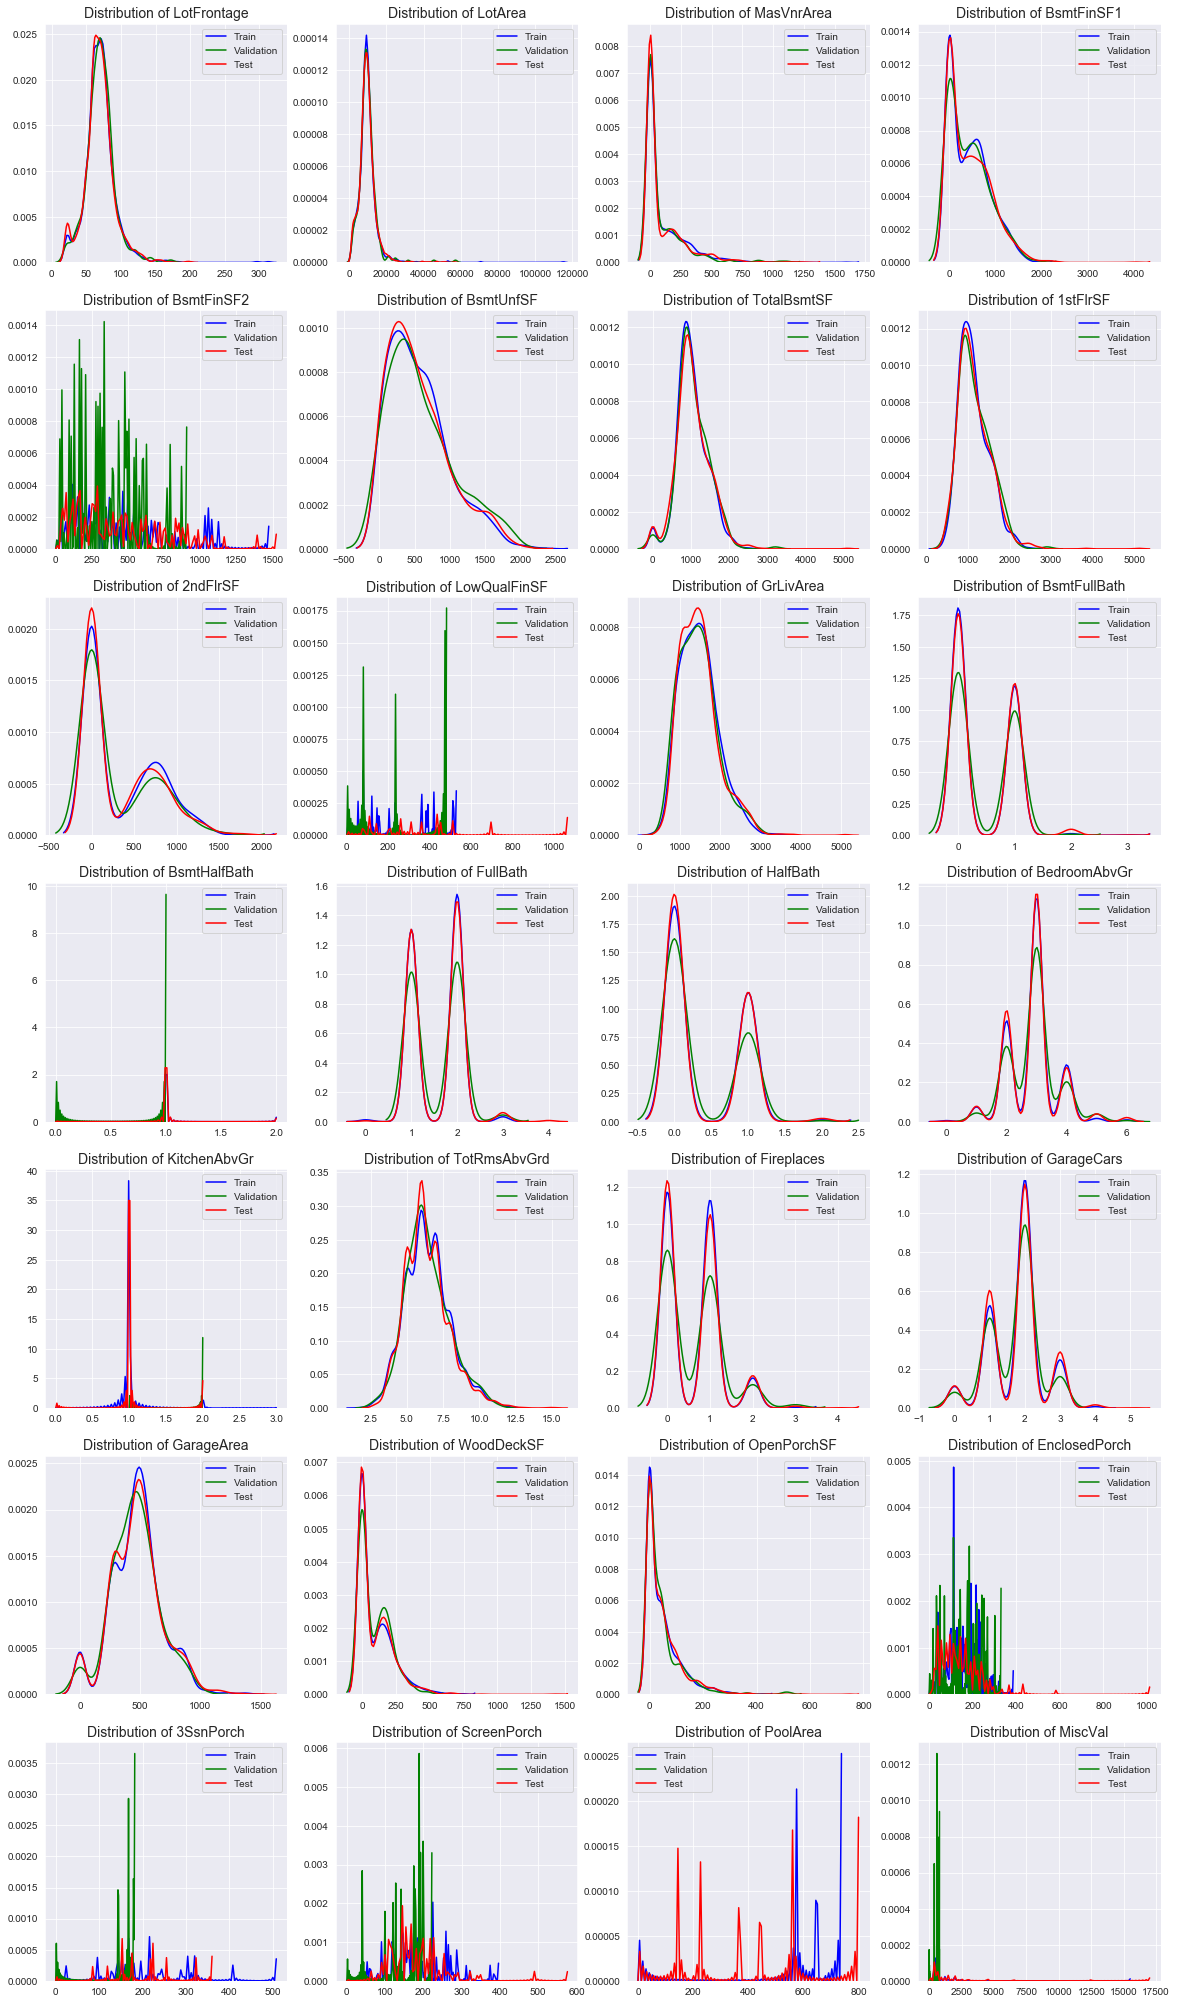

In [25]:
# visualize if distributions of train/validation/test sets are similar
# numerical features
ROWS, COLS = 7, 4
fig, axarr = plt.subplots(ROWS, COLS)
fig.set_size_inches(20, 36)

for r in range(ROWS):
    for c in range(COLS):
        num_feature = num_features[r*COLS + c]
        ax = axarr[r, c]
        sns.kdeplot(train[num_feature], color='b', ax=ax, label='Train')
        sns.kdeplot(val[num_feature], color='g', ax=ax, label='Validation')
        sns.kdeplot(test[num_feature], color='r', ax=ax, label='Test')
        ax.set_title("Distribution of {}".format(num_feature), fontsize=14)
plt.savefig("result/distributions_of_numerical_features.png", bbox_inches='tight')

In [26]:
# test if distributions of train/validation/test sets are similar
import os
import sys
module_path = '/Users/loanvo/datascience/util/covariate_shift'
if module_path not in sys.path:
    sys.path.append(module_path)
    
from covariate_shift import covariate_shift

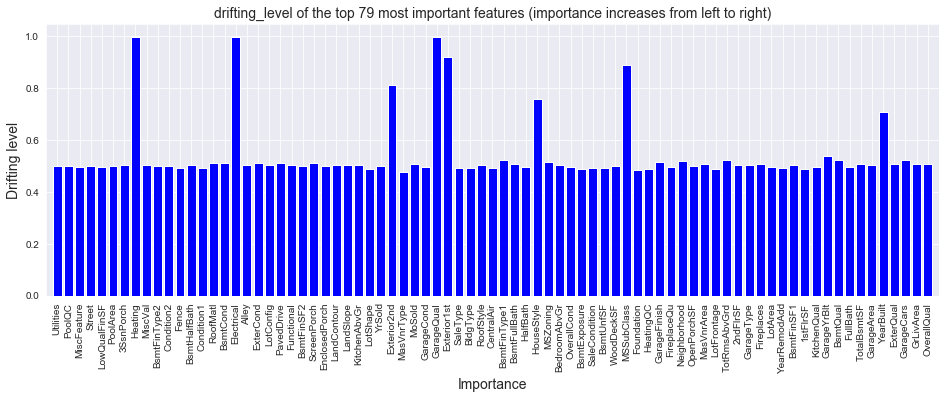

In [27]:
drift_importance_dict = covariate_shift(target_feature[0], pd.concat([train, val]), test)

drift_importance = pd.DataFrame.from_dict(drift_importance_dict, columns=["Drift", "Importance"], orient='index')
drift_importance.sort_values("Importance", axis=0, inplace=True)
drift_importance['Ranking by importance (least important=1)']= range(1, drift_importance.shape[0]+1)

totalnum = drift_importance.shape[0]
plt.figure(figsize=(16,5))
plt.bar(range(totalnum), drift_importance["Drift"], color = 'b', align='center')
plt.xticks(range(totalnum), drift_importance.index.tolist(), rotation='vertical')
plt.xlim([-1, totalnum])
plt.title("drifting_level of the top {} most important features (importance increases from left to right)".format(totalnum), fontsize=14)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Drifting level", fontsize=14)
plt.savefig('result/drifting.png', bbox_inches='tight')

In [28]:
high_drift = drift_importance[drift_importance["Drift"] > .8]
high_drift

,Drift,Importance,Ranking by importance (least important=1)
Heating,0.996378,0.000088,8
Electrical,0.996057,0.000311,17
Exterior2nd,0.810408,0.001160,31
GarageQual,0.997582,0.001352,35
Exterior1st,0.920907,0.001443,36
MSSubClass,0.888117,0.004305,52


In [29]:
high_drift_list = high_drift.index.tolist()

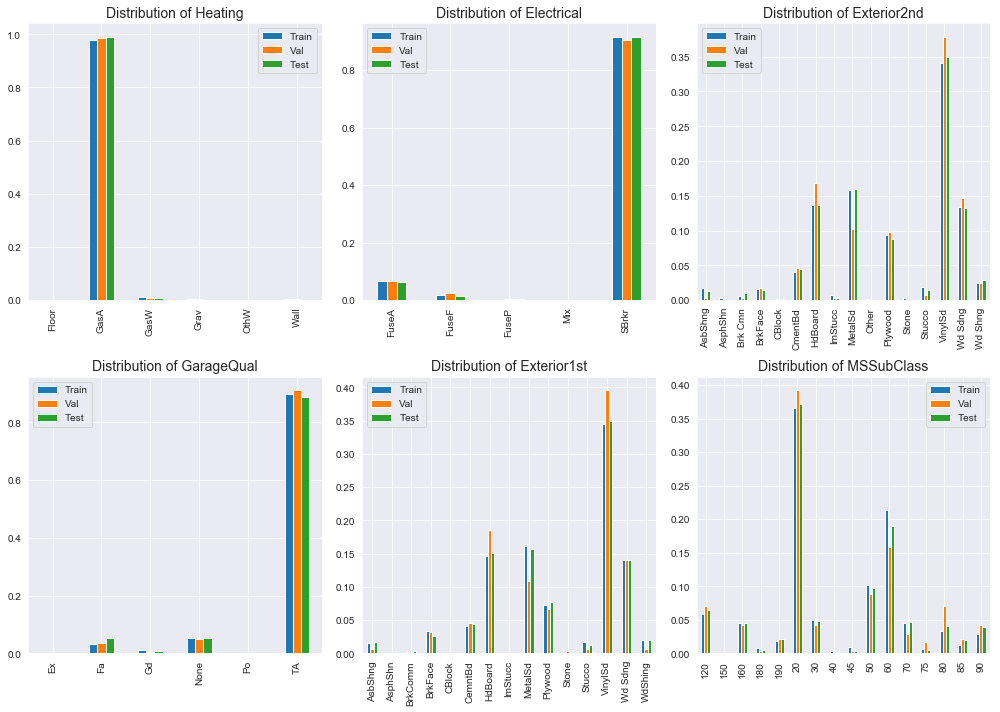

In [30]:
# Distribution of features which have high drifting but low importance
ROWS, COLS = 2, 3
fig, axarr = plt.subplots(ROWS, COLS)
fig.set_size_inches(14, 10)

df_dict = {}

for i, cat_feature in enumerate(high_drift_list):
    r, c = i//COLS, i%COLS
    ax = axarr[r, c]
    
    train_count = train[cat_feature].value_counts().rename("Train")
    val_count = val[cat_feature].value_counts().rename("Val")
    test_count = test[cat_feature].value_counts().rename("Test")
    
    df_dict[cat_feature] = pd.concat([train_count, val_count, test_count], axis=1)

    train_val_test = pd.concat([train_count/train.shape[0], 
                                val_count/val.shape[0], 
                                test_count/test.shape[0]], 
                               axis=1)
    train_val_test.plot(kind='bar', ax=ax)
    ax.set_title("Distribution of {}".format(cat_feature), fontsize=14)
plt.tight_layout()

In [31]:
df_dict["Heating"]

,Train,Val,Test
Floor,1,NaN,NaN
GasA,1110,281.0,1446.0
GasW,14,2.0,9.0
Grav,6,1.0,2.0
OthW,2,NaN,NaN
Wall,3,1.0,2.0


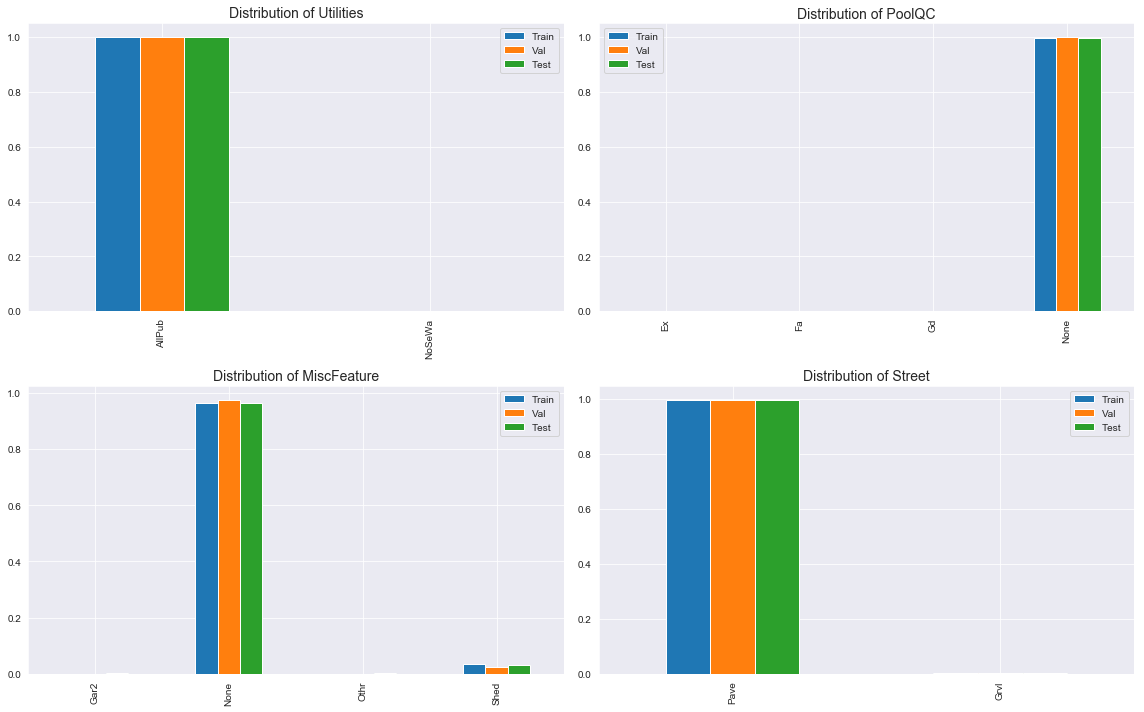

In [32]:
# Distribution of the 12 least "importance" category features
disp_num, ROWS, COLS = 4, 2, 2
fig, axarr = plt.subplots(ROWS, COLS)
fig.set_size_inches(16, 10)

df_dict = {}

for i, cat_feature in enumerate(drift_importance.index.tolist()[:disp_num]):
    r, c = i//COLS, i%COLS
    ax = axarr[r, c]
    
    train_count = train[cat_feature].value_counts().rename("Train")
    val_count = val[cat_feature].value_counts().rename("Val")
    test_count = test[cat_feature].value_counts().rename("Test")
    
    df_dict[cat_feature] = pd.concat([train_count, val_count, test_count], axis=1)

    train_val_test = pd.concat([train_count/train.shape[0], 
                                val_count/val.shape[0], 
                                test_count/test.shape[0]], 
                               axis=1)
    train_val_test.plot(kind='bar', ax=ax)
    ax.set_title("Distribution of {}".format(cat_feature), fontsize=14)
plt.tight_layout()
plt.savefig(f'result/Distribution_of_{disp_num}_least_important_features', bbox_inches='tight')

In [33]:
#'Utilities', 'Street', 'LowQualFinSF', 'Condition2', 'MiscFeature', 'PoolQC', 'Heating', 'MiscVal', 'BsmtHalfBath', 'ExterCond', 'Alley', '3SsnPorch'
#'Utilities',  'LowQualFinSF',  'Condition2',  'Street',  'PoolQC',  'MiscVal',  'PoolArea',  'MiscFeature',  'Heating',  'ExterCond',  'BsmtHalfBath',  'Electrical']
df_dict["Utilities"]

,Train,Val,Test
AllPub,1135,285.0,1459.0
NoSeWa,1,NaN,NaN


In [34]:
# Drop "Utilities" features as it is the least important one (all but except one has the value "AllPub")
# Drop "Heating" features: has very low 'importance' yet very high 'drifting'
#dropped_features = ['Utilities', 'Heating']
dropped_features = ['Utilities']
print("Before dropping features:", cat_features.shape[0], train.shape, val.shape, test.shape)
if True:
    cat_features = cat_features.drop(dropped_features)
    train.drop(dropped_features, axis=1, inplace=True)
    val.drop(dropped_features, axis=1, inplace=True)
    test.drop(dropped_features, axis=1, inplace=True)
print("After dropping features:", cat_features.shape[0], train.shape, val.shape, test.shape)

Before dropping features: 51 (1136, 80) (285, 80) (1459, 79)
After dropping features: 50 (1136, 79) (285, 79) (1459, 78)


In [35]:
# Target column
Y_train = pd.DataFrame(train.pop(target_feature[0]).astype('float'))
Y_val = pd.DataFrame(val.pop(target_feature[0]).astype('float'))
#print(type(Y_train), Y_train.dtype, Y.shape)
print("After separating target:", train.shape, val.shape, test.shape, Y_train.shape, Y_val.shape)

After separating target: (1136, 78) (285, 78) (1459, 78) (1136, 1) (285, 1)


In [36]:
# Save train, validation, test dataframe BEFORE SCALING
if False:
    save_dataframe_to_h5file(h5File_beforeScaling)

if True:
    with open(pklFile_beforeScaling, 'wb') as f:  
        pickle.dump([train, val, test, Y_train, Y_val, test_id, num_features, cat_features, cat_numlabel_features], f)

In [37]:
print(train.shape, val.shape, test.shape, Y_train.shape, Y_val.shape)

(1136, 78) (285, 78) (1459, 78) (1136, 1) (285, 1)


## 4.3 Scale (normalize or standardize) BOTH (numerical) features and TARGET

Excellent discussion about data scaling:
https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
It concludes that IN NEURON NETWORK REGRESSION we should scale not only the features but also the target 


The following post also has a nice illustration about the effect of data scaling. However, its conclusion seems WRONG - although it is safe to say "Normalizing the output will not affect shape of 𝑓", but large target y might result in large gradient --> parameters are updated with large values --> gradient might explode
https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re

In [38]:
def scale_numerical_vector(df_scalertrain, scaling_type='MinMaxScaler'):
    '''
    Input: 
        - df_scalertrain: dataframe used to estimate ('train') the scaler, i.e., df_train is used 
        to estimate min/max/std/mean
        - scaling_type: to choose between 'MinMaxScaler' or 'StandardScaler'
    Output: scaler object (for use of scaler.transform later)
    '''
    # initialize with the selected type of scaler
    if scaling_type == 'MinMaxScaler':
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
    elif scaling_type == 'StandardScaler':
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
    # fit scaler
    scaler.fit(df_scalertrain)
    return scaler

In [39]:
# scale input features
scaling_type = 'MinMaxScaler' # 'StandardScaler'
input_scaler = scale_numerical_vector(train[num_features], scaling_type)

#As the loss function if rmse between the log of predicted y and true one --> I don't feel
#it is necessary to scale?!!
#output_scaler = scale_numerical_vector(Y_train, scaling_type)

# apply the transform
train[num_features] = input_scaler.transform(train[num_features])
val[num_features] = input_scaler.transform(val[num_features])
test[num_features] = input_scaler.transform(test[num_features])

if 'output_scaler' in globals():
    Y_train = pd.DataFrame(output_scaler.transform(Y_train), columns=target_feature)
    Y_val = pd.DataFrame(output_scaler.transform(Y_val), columns=target_feature)

In [40]:
print(train.shape, val.shape, test.shape, Y_train.shape, Y_val.shape)

(1136, 78) (285, 78) (1459, 78) (1136, 1) (285, 1)


In [41]:
# Inspect the data after scaling
#X_train.describe().transpose()
#Y_train.describe().transpose()

In [42]:
train = pd.concat([train, Y_train], axis=1) 
val = pd.concat([val, Y_val], axis=1) 
#add a fake target column for test set as the df_to_dataset() requires the target column to transfer pd.Dataframe to tf.data.Dataset
test = pd.concat([test, pd.DataFrame(data = {target_feature[0]: np.zeros((test.shape[0]))}, dtype=np.float64)], axis=1)
print(train.shape, val.shape, test.shape, Y_train.shape, Y_val.shape)
#test.head()

(1136, 79) (285, 79) (1459, 79) (1136, 1) (285, 1)


In [43]:
# Save train, validation, test dataframe after scaling
if False:
    save_dataframe_to_h5file(h5File_afterScaling)
    
if True:
    with open(pklFile_afterScaling, 'wb') as f:  
        pickle.dump([train, val, test, Y_train, Y_val, test_id, num_features, cat_features, cat_numlabel_features], f)

In [44]:
# Load data from saved files (for fast and comparable ML run)
if False:
    train, Y_train, val, Y_val, test  = load_dataframe_from_h5file(h5File_toLoad)

if True:
    with open(pklFile_toLoad, 'rb') as f: 
        train, val, test, Y_train, Y_val, test_id, num_features, cat_features, cat_numlabel_features = pickle.load(f)

In [45]:
#Test if data are loaded successfully
print(train.shape, val.shape, test.shape, Y_train.shape, Y_val.shape)

(1136, 79) (285, 79) (1459, 79) (1136, 1) (285, 1)


# 5. Build the model
## 5.1 Wrap input features (columns in dataframe) into a suitable format for DNN layers

Wrapping Pandas dataframe with tf.data will enable us to use feature columns as a bridge to map from the columns in the Pandas dataframe to features used to train the model

Tutorial on how to handle different types of input features (numerical, categorical, etc.): 
https://www.tensorflow.org/alpha/tutorials/keras/feature_columns


In [46]:
def df_to_dataset(df, shuffle=True, batch_size=32):
    '''
    Goal: create a tf.data.Dataset from a pd.Dataframe
    Input:
    - df: dataframe including input features and target (name of target column is in target_feature[0])
    - shuffle: boolean 
    - batch_size: int of batch_size
    Output: data set ds in the format that can be called into feature_columns()
    '''
    df = df.copy() #work on the copy of input df so that the later df.pop won't change the original input df
    target = df.pop(target_feature[0])
    ds = tf.data.Dataset.from_tensor_slices((dict(df), target))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(df), seed=20)
    ds = ds.batch(batch_size)
    return ds

In [47]:
# Look at an example to verify the tf.data.Dataset structure
if False:
    # the input pipeline: change into the format that can be used for feature_columns
    batch_size = 5 #choose a randomly small number for this purpose
    train_ds = df_to_dataset(train, batch_size=batch_size)
    val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
    test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

    # have a look at one batch instant
    for feature_batch, label_batch in train_ds.take(1):
        print('Every feature:', list(feature_batch.keys()))
        print('A batch of GrLivArea:', feature_batch['GrLivArea'])
        print('A batch of targets:', label_batch )

In [48]:
def get_embedding_dim(cat_feature, train, test):
    '''
    Input: 
    - cat_feature: a string: name of feature 
    Ouptut:
    - embedding_dimensions =  number_of_categories**0.25
    (the above formula is from https://www.tensorflow.org/guide/feature_columns)
    '''
    cat_train = set(train[cat_feature].unique())
    cat_test = set(test[cat_feature].unique())
    result = cat_train.union(cat_test)
    return len(result)**.25 

def get_vocabulary_list(cat_feature, train, test):
    '''
    Input: 
    - cat_feature: a string: name of feature 
    Ouptut:
    - vocabulary_list: unique categories in cat_feature
    '''
    cat_train = set(train[cat_feature])
    cat_test = set(test[cat_feature])
    return cat_train.union(cat_test)

In [49]:
# See this tutorial for more options of input features (bucketizing, one-hot-vector, etc.)
# https://www.tensorflow.org/alpha/tutorials/keras/feature_columns

feature_columns = []

# The following 2 lines is for testing the output of DenseFeatures(feature_column)
#example_train_ds = df_to_dataset(train, batch_size=3)
#example_batch = next(iter(example_train_ds))[0]

# numeric cols
for num_feature in num_features:
    feature_columns.append(feature_column.numeric_column(num_feature))
    # The following 3 lines is for testing the output of DenseFeatures(feature_column)
    #example_feature_layer = tf.keras.layers.DenseFeatures(feature_column.numeric_column(num_feature))
    #print(example_batch[num_feature])
    #print(example_feature_layer(example_batch))

# build vocabulary_lists
vocabulary_lists = {cat_feature: get_vocabulary_list(cat_feature, train, test) 
                    for cat_feature in cat_features} 

# embedding
for cat_feature, vocabulary_list in vocabulary_lists.items():
    cat_with_vocabulary = feature_column.categorical_column_with_vocabulary_list(
        cat_feature, vocabulary_list)
    # embedding_dimensions =  number_of_categories**0.25
    # reference:  https://www.tensorflow.org/guide/feature_columns
    embedding_dim = int(ceil(len(vocabulary_list)**.25))
    feature_columns.append(feature_column.embedding_column(cat_with_vocabulary, dimension=embedding_dim))
    # The following 3 lines is for testing the output of DenseFeatures(feature_column)
    #example_feature_layer = tf.keras.layers.DenseFeatures(feature_column.embedding_column(cat_with_vocabulary, dimension=embedding_dim))
    #print('embeding_dim=', embedding_dim, '. Example: ', example_batch[cat_feature])
    #print(example_feature_layer(example_batch))


    
#feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
#print(type(feature_layer))
#print(len(feature_layer(example_batch).numpy()[0]))
#print(feature_layer)


In [50]:
# To verify if the above feature_columns step is working
if False:
    feature_layer = tf.keras.layers.DenseFeatures(feature_columns)
    train_ds = df_to_dataset(train, batch_size=3)
    example_batch = next(iter(train_ds))[0]
    nn_ready_features = feature_layer(example_batch).numpy() #tensor.numpy(): Returns a numpy array or a scalar with the same contents as the Tensor
    print(len(nn_ready_features[0]))
    print(nn_ready_features)

## 5.2 Build DNN
Tutorial on how to build a DNN regression with Tensor/Keras:
https://www.tensorflow.org/tutorials/keras/basic_regression

In [51]:
def rmse_log_y(y_true, y_pred):
    return K.sqrt(K.mean((keras.backend.log(y_true) - keras.backend.log(y_pred))**2))

def build_model():
    num_of_units = 1024
    model = keras.Sequential([
        layers.DenseFeatures(feature_columns), 
        layers.Dense(num_of_units, activation=tf.nn.relu), 
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)
    #optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
    
    # Since in this particular competition, error is evaluated as  Root-Mean-Squared-Error (RMSE) 
    # between the logarithm of the predicted value and the logarithm of the observed sales price
    model.compile(loss='mean_squared_logarithmic_error',
                  optimizer=optimizer,
                  metrics=[rmse_log_y])
    return model

In [52]:
# Display training progress by printing a dot for each epoch
class print_dot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        #example of logs value: logs={'loss': 121.2577639099554, 'rmse_log_y': 11.551327, 'val_loss': 104.99076476619437, 'val_rmse_log_y': 10.435247}
        if epoch % 10 == 0: 
            print('. ', end='')
            #print the current epoch number and loss value
            #print(f"At epoch {epoch} with validation loss value {logs['val_loss']}")

batch_size = 32
checkpoint_path = 'result/allfeatures/{}'.format(output) + '_{epoch:04d}.ckpt' #include the epoch in the file name. (uses `str.format`)

# create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, verbose=0, 
    save_weights_only=True, period=10) 

In [53]:
def plot_history(history, ax=None):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    print(type(ax), ax)
    if ax is None:
        _, ax = plt.subplots()
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Root Mean Square Error [log(SalePrice)^2]')
    ax.plot(hist['epoch'], hist['rmse_log_y'], '--', label='Train Error')
    ax.plot(hist['epoch'], hist['val_rmse_log_y'], '-.', label = 'Val Error')
    ax.set_ylim([0, 5])
    ax.legend()
    ax.set_title(f"Min validation rmse: {min(hist['val_rmse_log_y'])}")



In [54]:
# transfer from dataframe to the format for tensor DNN
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [55]:
EPOCHS = 1000

W0418 00:31:24.376116 140735784743808 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/feature_column/feature_column_v2.py:3048: VocabularyListCategoricalColumn._num_buckets (from tensorflow.python.feature_column.feature_column_v2) is deprecated and will be removed in a future version.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
W0418 00:31:24.498346 140735784743808 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/feature_column/feature_column_v2.py:2758: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
W0418 00:31:24.538810 140735784743808 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/lookup_ops.py:1347: to_int64 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future versi

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . <class 'NoneType'> None


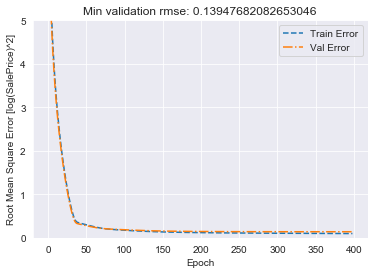

In [56]:
#build the model
model = build_model()

#Early stopping (based on monitor val_loss)
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_ds, 
                    epochs=EPOCHS, 
                    validation_data=val_ds, 
                    verbose=0,
                    callbacks=[cp_callback, early_stop, print_dot()])
plot_history(history)

<class 'matplotlib.axes._subplots.AxesSubplot'> AxesSubplot(0.125,0.125;0.352273x0.755)
<class 'matplotlib.axes._subplots.AxesSubplot'> AxesSubplot(0.547727,0.125;0.352273x0.755)


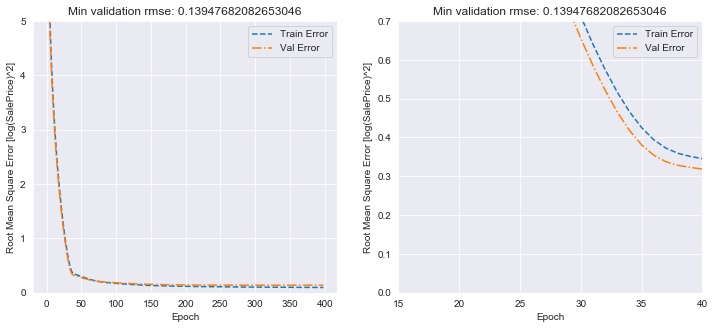

In [57]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
plot_history(history, ax[0])
plot_history(history, ax[1])
ax[1].set_ylim([0,.7])
ax[1].set_xlim([15, 40])
plt.show()
fig.savefig(f'result/rmse_{output}.png')

In [58]:
type(history.history)

dict

In [59]:

print(history.history['rmse_log_y'])

[nan, 7.38522, 6.5265484, 5.872149, 5.346364, 4.907152, 4.529638, 4.198382, 3.9030201, 3.6364064, 3.393346, 3.169958, 2.963267, 2.7709453, 2.5911355, 2.4223363, 2.263318, 2.113062, 1.9707189, 1.8355772, 1.7070383, 1.5846002, 1.4678451, 1.3564296, 1.2500815, 1.1485982, 1.0518479, 0.9597781, 0.87242675, 0.7899417, 0.7126064, 0.6408685, 0.5753678, 0.51695263, 0.46665594, 0.42553487, 0.394248, 0.37258497, 0.35915768, 0.35116494, 0.34557652, 0.3407055, 0.3360119, 0.33136955, 0.32675183, 0.3221522, 0.31756803, 0.31299797, 0.30844128, 0.30389768, 0.2993678, 0.29485303, 0.29035553, 0.28587836, 0.28142563, 0.27700225, 0.27261424, 0.26826832, 0.2639723, 0.2597349, 0.2555656, 0.25147444, 0.24747205, 0.24356931, 0.23977712, 0.23610616, 0.23256665, 0.22916763, 0.22591676, 0.2228201, 0.21988158, 0.21710257, 0.21448213, 0.21201672, 0.20970033, 0.20752496, 0.20548081, 0.20355678, 0.20174104, 0.2000216, 0.19838673, 0.19682549, 0.1953277, 0.19388443, 0.19248788, 0.19113135, 0.18980941, 0.18851729, 0.187

In [60]:
Y_test = model.predict(test_ds).flatten()

In [61]:
# Scale back targe values of test samples if normalization was applied on target of train samples
if 'output_scaler' in globals():
    Y_test = output_scaler.inverse_transform(Y_test.reshape(-1, 1))

In [62]:
# Write prediction result into file for submission
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = Y_test
sub.to_csv(f'submission{output}.csv', index=False)

In [63]:
model.save(f'model/model{output}.h5'.format(batch_size, EPOCHS))